## Q1. 다음은 빅데이터 수집방식에 대한 설명이다. 빈 칸에 알맞은 방식을 고르시오

1. a 로그수집
2. f 크롤링
3. c 오픈API
4. e 센서수집

## Q2. 크롤링의 개념과 필요성에 대해 서술하시오.

크롤링이란 웹 상에 있는 많은 데이터 정보를 자동으로 긁어 모으는 방식을 말합니다. 
다양하고 많은 데이터를 자동으로 수집하는데 있으며, 편의성을 제공하기 때문에 데이터 수집에 있어서 필요합니다.

## Q3. BeautifulSoup모듈에 대해 서술하시오.

데이터를 객체화 해주는 모듈

## Q4. 다음 두 보기의 차이를 설명하시오.
- ➀ find_element(By.CLASS_NAME,‘img-lazy’)
- ➁ find_elements(By.CLASS_NAME,‘img-lazy’)

1번은 해당클래스의 요소 중 0번째 있는 요소만을 가져오고, 2번은 해당 클래스의 모든 요소들의 값을 가져온다.

## Q5. 다음은 HTML코드로 이루어진 웹 페이지이다. 밑줄 그어진 부분을 BeautifulSoup
 모듈의 함수를 이용하여 텍스트만 수집할 수 있는 코드에 빈칸을 작성하시오.

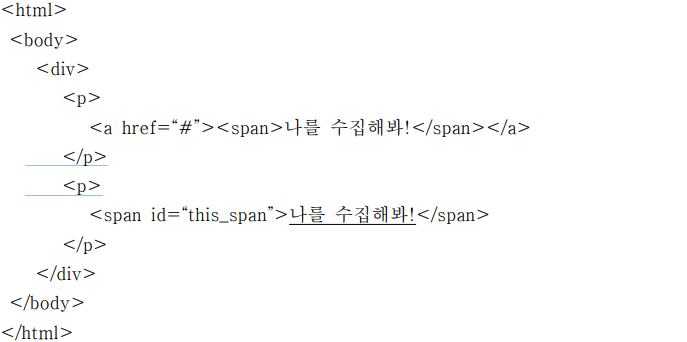

text = bs.select('#this_span')

## Q6. 자동제어를 통해 네이버 홈페이지에 접속하고 ‘크롤링’를 입력하여 검색하는 수집시스템을 구축하시오

In [21]:
from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import time
import pandas as pd

In [7]:
driver = wb.Chrome()
driver.get('https://www.naver.com')

time.sleep(10)

search = driver.find_element(By.CLASS_NAME,'input_text')
search.send_keys('크롤링')
search.send_keys(Keys.ENTER)

## Q7. 자동제어를 통해 G마켓 홈페이지에 접속하고, 조건에 맞는 수집프로그램을 만드시오.
1. G마켓 Best 카테고리 All에서 1~20위까지 수집하는 프로그램을 만드시오. - 상품명, 가격
2. 수집한 데이터를 DataFrame으로 만드시오.

In [73]:
driver = wb.Chrome()
driver.get('https://www.gmarket.co.kr/n/best')
driver.maximize_window()

names = driver.find_elements(By.CSS_SELECTOR, 'a.itemname')
oprice = driver.find_elements(By.CSS_SELECTOR,'div.o-price')
sprice = driver.find_elements(By.CSS_SELECTOR,'div.s-price > strong')

names_list = []
o_price_list = []
s_price_list = []

for i in range(20):
    names_list.append(names[i].text)
    o_price_list.append(oprice[i].text.replace('정가\n',''))
    s_price_list.append(sprice[i].text.replace('할인가\n',''))
    
data = {'상품명':names_list,'가격(정가)':o_price_list,'가격(원가)':s_price_list}

gmarket_df = pd.DataFrame(data)
gmarket_df

,상품명,가격(정가),가격(원가)
0,스포츠 쿨링 세트 1+1 팔토시 쿨워머 등산 라이딩 낚시 자외선차단,"35,000원","10,500원"
1,[미즈노]미즈노 쿠션 미드 5족,"39,600원","11,900원"
2,[제스프리]제스프리 골드키위 2kg 공식인증 점보,"33,140원","23,200원"
3,추추추어탕 500g 5팩 국내산 미꾸라지만 사용,"20,300원","15,390원"
4,[에스티로더](신세계강남점)[단독] 더블웨어 파운데이션 세트 (+프라이머 정품),"84,000원","67,830원"
5,산지직송 꿀달달 성주 참외 5kg (혼합과),,"18,900원"
6,[한우물]한우물 주먹밥 15개 세트구성 ( 참치김치 5 + 참치마요 5 + 소불고기 5),"20,800원","15,770원"
7,(VER SET / JEWEL SET) JOOHONEY THE 1ST MINI AL...,,"89,100원"
8,(VER SET) JOOHONEY THE 1ST MINI ALBUM LIGHTS,,"53,400원"
9,[오뚜기]진라면 매운맛 40봉,"26,600원","23,600원"


In [74]:
driver.quit()

## Q8. 멜론차트에서 1~100위까지 정보를 수집하는 프로그램을 작성하시오.
1. 수집할 정보는 곡정보에 있는 곡명과 가수명 이다.
 2. pandas의 DataFrame형태로 ‘순위’를 기준으로 결과를 출력하여야 한다.
 3. csv파일로 한글이 깨지지 않게 저장할 수 있는 코드를 작성하여야 한다

In [93]:
driver = wb.Chrome()
driver.get('https://www.melon.com/chart/')
driver.maximize_window()

music_names = driver.find_elements(By.CSS_SELECTOR,'div.ellipsis.rank01')
singer_names = driver.find_elements(By.CSS_SELECTOR,'div.ellipsis.rank02')

music_list = []
singer_list = []
rank = []

for i in range(100):
    music_list.append(music_names[i].text)
    
    singer_list.append(singer_names[i].text)
    
    rank.append(f'{i+1}순위')
    
    
data = {'노래':music_list,'가수':singer_list}

music_chart_df = pd.DataFrame(data,index=rank)
music_chart_df

IVE (아이브)
IVE (아이브)
LE SSERAFIM (르세라핌)
지수 (JISOO)
세븐틴 (SEVENTEEN)
부석순 (SEVENTEEN)
NewJeans
NewJeans
Agust D
NewJeans
볼빨간사춘기
STAYC(스테이씨)
세븐틴 (SEVENTEEN)
윤하 (YOUNHA)
허각
임영웅
Charlie Puth
박재정
Zior Park
던 (DAWN)
DK(디셈버)
임영웅
IVE (아이브)
LE SSERAFIM (르세라핌)
임영웅
임재현
NMIXX
NewJeans
지민
임영웅
IVE (아이브)
FIFTY FIFTY
임영웅
Charlie Puth
임영웅
세븐틴 (SEVENTEEN)
임영웅
imase
임영웅
임한별
세븐틴 (SEVENTEEN)
비투비
임영웅
멜로망스
임영웅
임영웅
세븐틴 (SEVENTEEN)
지아
세븐틴 (SEVENTEEN)
임영웅
방탄소년단
임영웅
성시경
우디 (Woody)
이채연
#안녕
주주 시크릿
임영웅
방탄소년단
H1-KEY (하이키)
NCT DREAM
NCT 도재정
#안녕
(여자)아이들
Charlie Puth
세븐틴 (SEVENTEEN)
DK(디셈버)
방탄소년단
The Kid LAROI, Justin Bieber
테이
태양
우디 (Woody)
LE SSERAFIM (르세라핌)
BLACKPINK
V.O.S
김민석 (멜로망스)
NewJeans
j-hope, J. Cole
IVE (아이브)
BLACKPINK
지코 (ZICO)
송하예
(여자)아이들
방탄소년단
10CM
주호
BIG Naughty (서동현)
포맨 (4MEN)
경서예지, 전건호
WSG워너비 (가야G)
한동근
윤하 (YOUNHA)
Say Yes!
NewJeans
Agust D
지민
폴킴
태양
헤이즈 (Heize)
김호중


,노래,가수
1순위,I AM,IVE (아이브)
2순위,Kitsch,IVE (아이브)
3순위,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌)
4순위,꽃,지수 (JISOO)
5순위,손오공,세븐틴 (SEVENTEEN)
...,...,...
96순위,Set Me Free Pt.2,지민
97순위,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴
98순위,나의 마음에 (Seed),태양
99순위,빙글빙글 (Prod. R.Tee),헤이즈 (Heize)


In [94]:
music_chart_df.to_csv('C:/Users/user06/Desktop/melon_chart.csv',encoding='euc-kr')

In [ ]:
driver.quit()

## Q9. 자동제어를 통해 유튜브 페이지에 접속하고 원하는 검색어를 입력하여 검색 후, 100개 이상의 영상 제목과 조회수를 수집하시오.
1. 수집할 정보는 100개이상의 영상제목과 조회수이다.
 2. pandas의 DataFrame형태로 결과를 출력하여야 한다.
 3. csv파일로 한글이 깨지지 않게 저장할 수 있는 코드를 작성하여야 한다.
 - ※ 코드를 실행했을 때 100개 이상의 영상이 출력 되어야한다. 
 - ※ 조회수 크롤링 시 업로드 날짜가 아닌 조회숫자만 출력되어야 한다

In [141]:
driver = wb.Chrome()
driver.get('https://www.youtube.com/')
driver.maximize_window()

In [142]:
youtube_search = driver.find_element(By.CSS_SELECTOR,'input#search.gsfi.ytd-searchbox')
youtube_search.send_keys('크롤링')
youtube_search.send_keys(Keys.ENTER)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"input#search.gsfi.ytd-searchbox"}
  (Session info: chrome=113.0.5672.64)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00DEDCE3+50899]
	(No symbol) [0x00D7E111]
	(No symbol) [0x00C85588]
	(No symbol) [0x00CB08F9]
	(No symbol) [0x00CB0AFB]
	(No symbol) [0x00CDF902]
	(No symbol) [0x00CCB944]
	(No symbol) [0x00CDE01C]
	(No symbol) [0x00CCB6F6]
	(No symbol) [0x00CA7708]
	(No symbol) [0x00CA886D]
	GetHandleVerifier [0x01053EAE+2566302]
	GetHandleVerifier [0x010892B1+2784417]
	GetHandleVerifier [0x0108327C+2759788]
	GetHandleVerifier [0x00E85740+672048]
	(No symbol) [0x00D88872]
	(No symbol) [0x00D841C8]
	(No symbol) [0x00D842AB]
	(No symbol) [0x00D771B7]
	BaseThreadInitThunk [0x761D7D49+25]
	RtlInitializeExceptionChain [0x77A0B74B+107]
	RtlClearBits [0x77A0B6CF+191]


In [132]:
body = driver.find_element(By.TAG_NAME,'body')

for i in range(80):
    body.send_keys(Keys.END)

KeyboardInterrupt: 

In [134]:
names = driver.find_elements(By.CSS_SELECTOR,'#video-title')
nums = driver.find_elements(By.CSS_SELECTOR,'span.inline-metadata-item.style-scope.ytd-video-meta-block')

name_list =[]
nums_list = []

for i in range(len(names)):
    names_list.append(names[i].text)
    nums_list.append(nums[i].text)
    
data = {'제목':name_list,'조회수':nums_list}
youtube_df = pd.DataFrame(data)
youtube_df

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=113.0.5672.64)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00DEDCE3+50899]
	(No symbol) [0x00D7E111]
	(No symbol) [0x00C85588]
	(No symbol) [0x00C6D333]
	(No symbol) [0x00CCF4DB]
	(No symbol) [0x00CDDB33]
	(No symbol) [0x00CCB6F6]
	(No symbol) [0x00CA7708]
	(No symbol) [0x00CA886D]
	GetHandleVerifier [0x01053EAE+2566302]
	GetHandleVerifier [0x010892B1+2784417]
	GetHandleVerifier [0x0108327C+2759788]
	GetHandleVerifier [0x00E85740+672048]
	(No symbol) [0x00D88872]
	(No symbol) [0x00D841C8]
	(No symbol) [0x00D842AB]
	(No symbol) [0x00D771B7]
	BaseThreadInitThunk [0x761D7D49+25]
	RtlInitializeExceptionChain [0x77A0B74B+107]
	RtlClearBits [0x77A0B6CF+191]
